Llibreries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import matplotlib
import os
import zipfile
from PIL import Image

Descarregar dades desde github

In [0]:
!wget "https://github.com/gdsa-upc/2019-Equip1/raw/master/Dades_tb2018/tb2018.zip" -O Dades.zip

--2019-11-28 19:26:02--  https://github.com/gdsa-upc/2019-Equip1/raw/master/Dades_tb2018/tb2018.zip
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gdsa-upc/2019-Equip1/master/Dades_tb2018/tb2018.zip [following]
--2019-11-28 19:26:02--  https://raw.githubusercontent.com/gdsa-upc/2019-Equip1/master/Dades_tb2018/tb2018.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1974555 (1.9M) [application/zip]
Saving to: ‘Dades.zip’

Dades.zip           100%[===================>]   1.88M  --.-KB/s    in 0.09s   

2019-11-28 19:26:03 (21.4 MB/s) - ‘Dades.zip’ saved [1974555/1974555]



Extraer el zip 

In [0]:
f = zipfile.ZipFile("Dades.zip",'r')
for file in f.namelist():
    f.extract(file,"./Dades/")  # Guardar en el directori /Dades/
f.close()

Carregar les imatges

In [0]:
from os.path import isfile, join

# Obtener tots els fitxers a la carpeta TRAIN  
files_train = [f for f in os.listdir("./Dades/train") if isfile(join("./Dades/train", f))]
# Guardar imatges de train en una matriu
x_train = np.array([np.array(Image.open("./Dades/train/"+file)) for file in files_train])

# Obtener tots els fitxers a la carpeta TEST
files_test = [f for f in os.listdir("./Dades/test") if isfile(join("./Dades/test", f))]
# Guardar imatges de test en una matriu
x_test = np.array([np.array(Image.open("./Dades/test/"+file)) for file in files_test])

Visualitzem una imatge

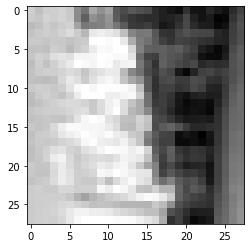

In [0]:
plt.imshow(x_train[1,:,:], cmap='gray')

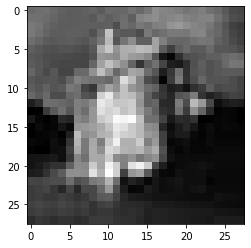

In [0]:
plt.imshow(x_test[1,:,:], cmap='gray')

Mostrar el nombre total de imatges i la mida de una imatge

In [0]:
print("x_train shape:", x_train.shape) 
print("x_test shape:", x_test.shape)

x_train shape: (1671, 28, 28)
x_test shape: (1006, 28, 28)


In [0]:
Num_train = len(x_train[:,1,1])     # Nombre total de les imatges
dimx_train = len(x_train[1,:,1])    # Altura de imatge
dimy_train = len(x_train[1,1,:])    # Amplada de imatge

Num_test = len(x_test[:,1,1])
dimx_test = len(x_test[1,:,1])
dimy_test = len(x_test[1,1,:])

Extracció de descriptors

In [0]:
x_train = x_train.reshape(Num_train, dimx_train*dimy_train);
print("x_train shape:", x_train.shape) 
x_test = x_test.reshape(Num_test, dimx_test*dimy_test);
print("x_test shape:", x_test.shape)


x_train shape: (1671, 784)
x_test shape: (1006, 784)


Normalització de descriptors

In [0]:
x_train_n = sklearn.preprocessing.normalize(x_train)
x_test_n = sklearn.preprocessing.normalize(x_test)

Calculem similituds

In [0]:
x_train_n = x_train_n.transpose()
sim = np.matmul(x_test_n, x_train_n)

In [0]:
print(sim)
print("sim shape:", sim.shape)

[[0.79989606 0.78833078 0.90326919 ... 0.80473229 0.86951344 0.84952021]
 [0.73897658 0.81683433 0.76372128 ... 0.72614573 0.76115499 0.80257267]
 [0.85794684 0.77133496 0.73757412 ... 0.75077707 0.79991377 0.75639843]
 ...
 [0.87022957 0.74344478 0.82377406 ... 0.89306423 0.88435967 0.85402937]
 [0.53739504 0.70484462 0.63461506 ... 0.3798124  0.55914686 0.60494951]
 [0.85981182 0.8483555  0.86698345 ... 0.82553223 0.88303827 0.84679252]]
sim shape: (1006, 1671)


Ordenem els valors

In [0]:
ranks = np.argsort(sim, axis=1)[:,::-1]

Visualització de resultats

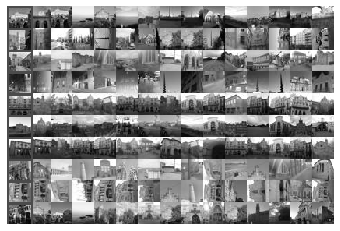

In [0]:
from PIL import Image, ImageOps

# get the original images for visualization
x_train = np.reshape(x_train, (Num_train, dimx_train, dimy_train))
x_test = np.reshape(x_test, (Num_test, dimx_test, dimy_test))

h,w = (28, 28)
new_image= Image.new('RGB', (h*15,w*10))

# Visualize ranks of the 10 queries
offset = 10 # it will show results from query #'offset' to #offset+10
for q in range(10):
  ranks_q = ranks[q*(offset+1),:]
  for i in range(15):
      new_image.paste( Image.fromarray(x_train[ranks_q[i]]), (h*(1+i),w*q ))

  # visualize query
  ima_q = Image.fromarray(x_test[q*(offset+1),...])
  ima_q = ImageOps.expand(ima_q, border=3, fill='green')

  new_image.paste(ima_q, (0,w*q))

plt.imshow(new_image)
plt.axis('off')
plt.show()